<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_4_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек


In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.python.keras.optimizers import Adam, RMSprop

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Загрузка файлов

#Загрузка данных


In [0]:
###########################
# Чтение файла в текст
##########################
def readText(fileName): #функция принимает имя файла
  f = open(fileName, 'r')        #задаем открытие нужного файла в режиме чтения
  text = f.read()                #читаем текст
  text = text.replace("\n", " ") #переносы строки переводим в пробелы
  
  return text                    #функция возвращает текст файла

#Загружаем обучающие тексты
trainText = []
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Стругацкие) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Клиффорд_Саймак) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Макс Фрай) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Рэй Брэдберри) Обучающая_22 вместе.txt')) 

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери"]
nClasses = len(className)

#Загружаем тестовые тексты
testText = []
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Стругацкие) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Клиффорд_Саймак) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Макс Фрай) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Базы/Тексты писателей/(Рэй Брэдберри) Тестовая_8 вместе.txt'))

#Обработка данных

In [0]:
#################
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#################

maxWordsCount = 20000 #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

#для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
#выше задаем параметры:
#(num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
#(lower=True) - приводим слова к нижнему регистру
#(split=' ') - разделяем слова по пробелу
#(char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(trainText) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items()) #Вытаскиваем индексы слов для просмотра

In [0]:
print(items[:100])

[('и', 1), ('в', 2), ('не', 3), ('я', 4), ('что', 5), ('на', 6), ('с', 7), ('он', 8), ('а', 9), ('как', 10), ('то', 11), ('это', 12), ('но', 13), ('все', 14), ('у', 15), ('по', 16), ('его', 17), ('к', 18), ('так', 19), ('мне', 20), ('из', 21), ('за', 22), ('меня', 23), ('ты', 24), ('же', 25), ('сказал', 26), ('бы', 27), ('было', 28), ('вы', 29), ('от', 30), ('они', 31), ('мы', 32), ('только', 33), ('да', 34), ('еще', 35), ('она', 36), ('о', 37), ('когда', 38), ('вот', 39), ('уже', 40), ('если', 41), ('был', 42), ('ни', 43), ('их', 44), ('нет', 45), ('чтобы', 46), ('до', 47), ('ну', 48), ('для', 49), ('ему', 50), ('может', 51), ('или', 52), ('ничего', 53), ('даже', 54), ('там', 55), ('очень', 56), ('кто', 57), ('ее', 58), ('тут', 59), ('потом', 60), ('просто', 61), ('него', 62), ('чем', 63), ('быть', 64), ('теперь', 65), ('под', 66), ('где', 67), ('нас', 68), ('есть', 69), ('тебя', 70), ('время', 71), ('ли', 72), ('тебе', 73), ('со', 74), ('во', 75), ('вас', 76), ('раз', 77), ('нибудь',

In [0]:
print("Размер словаря", len(items))

Размер словаря 144056


In [0]:
print("Протестируем словарь частотности")
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("уточните слово: ")]) #протестируем словарь частотности

Протестируем словарь частотности
уточните слово: преисподней
Интересующее слово имеет индекс:  29221


In [0]:
#преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) #обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  #проверочные тесты в индексы

print("Взглянем на фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[1] [:87])
print("Он же в виде последовательности индексов: ", trainWordIndexes[1][:20])

print()
print()

print("Статистика по обучающим текстам:")
for i in range(6):
  print(className[i], " ", len(trainText[i]), " символов, ", len(trainWordIndexes[i]), " слов")
print("В сумме ", len(trainText[0])+len(trainText[1])+len(trainText[2])+len(trainText[3])+len(trainText[4])+len(trainText[5]), " символов, ", len(trainWordIndexes[0])+len(trainWordIndexes[1])+len(trainWordIndexes[2])+len(trainWordIndexes[3])+len(trainWordIndexes[4])+len(trainWordIndexes[5]), " слов")
print()
print("Статистика по обучающим текстам:")
for i in range(6):
  print(className[i], " ", len(testText[i]), " символов, ", len(testWordIndexes[i]), " слов")
print("В сумме ", len(testText[0])+len(testText[1])+len(testText[2])+len(testText[3])+len(testText[4])+len(testText[5]), " символов, ", len(testWordIndexes[0])+len(testWordIndexes[1])+len(testWordIndexes[2])+len(testWordIndexes[3])+len(testWordIndexes[4])+len(testWordIndexes[5]), " слов")

Взглянем на фрагмент обучающего текста:
В виде оригинального текста:               Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Он же в виде последовательности индексов:  [469, 21, 1481, 48, 1, 12724, 7722, 4, 414, 3, 251, 1, 3, 246, 54, 5, 239, 10516, 2646, 183]


Статистика по обучающим текстам:
О. Генри   1049517  символов,  131775  слов
Стругацкие   2042469  символов,  264283  слов
Булгаков   1765648  символов,  213298  слов
Саймак   1609507  символов,  221218  слов
Фрай   3700010  символов,  499867  слов
Брэдбери   1386454  символов,  182882  слов
В сумме  11553605  символов,  1513323  слов

Статистика по обучающим текстам:
О. Генри   349662  символов,  41755  слов
Стругацкие   704846  символов,  87117  слов
Булгаков   875042  символов,  105967  слов
Саймак   318811  символов,  42677  слов
Фрай   1278191  символов,  163848  слов
Брэдбери   868673  символов,  106664  слов
В сумме  4395225  символов,  548028  слов


#Создание обучающей и проверочной выборки

**Функции для формирования выборки по отрезкам текста с заданным шагом**



In [0]:
###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  
  #Идём по всей длине вектора индексов
  #"Откусываем" векторы длины xLen и смещаеммся вперёд на step
  
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
    
  return xSample

In [0]:
###########################
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
##########################
def createSetsMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов выборки
  classesXSamples = []        #здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна(например 6 по 1341*1000)"
  for wI in wordIndexes:      #для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) #добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  #Формируем один общий xSamples
  xSamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной 6"
  
  for t in range(nClasses): #в диапазоне кол-ва классов(6)
    xT = classesXSamples[t] #берем очередной текст вида "кол-во окон в тексте*длину окна"(например 1341*1000)
    for i in range(len(xT)): #и каждое его окно
      xSamples.append(xT[i]) #добавляем в общий список выборки
    
    #Формируем ySamples по номеру класса
    currY = utils.to_categorical(t, nClasses) #текущий класс переводится в вектор длиной 6 вида [0.0.0.1.0.0.]
    for i in range(len(xT)): #на каждое окно выборки 
      ySamples.append(currY) #добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) #переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) #переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples) #функция возвращает выборку и соответствующие векторы классов

**Подготовка данных**


In [0]:
#Задаём базовые параметры
xLen = 1000 #Длина отрезка текста, по которой анализируем, в словах
step = 100 #Шаг разбиения исходного текста на обучающие вектора

In [0]:
#Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
#получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

(15075, 1000)
(15075, 6)
(5423, 1000)
(5423, 6)


In [0]:
print(xTrain[0])

[    6  1732     2    10  7514     2  3236   273  1044    15   256  2118
     6   645     8  2526     2  1630  7852  9574   955    10    27    54
   131   129   122  1443  3237   920  1152 15416    35   189    63  2624
  4807   937  1907  2890     2 10108     1 16929   220    10 15417   143
   712   582   273     1  1989  6647    16   372 14208    75    14  1487
 14209 10777  1193     6 14209   104  8637  7515    49    62 14210  2625
   243   273  4188    79  2449 11436     3   737  3472     2  1732  4189
  4667     7  8222  1291  6164  2119   908   279  7195   335  6924   220
 12194    16   144 11436   899     7  6648  9045  5499  4808    30  4529
     1  1216 13093  3861     6  7196     1 15418     1  2527 10777  1193
   104   306  1887   137    42  5500     1  3177     5  1193     6   959
     7   943   104     1  4953     2   178 18766  4190  1888     5  1887
  1193   320    11  3473   870 10778 14211    94     2  1265 16930    38
     2  1631  2313 10109 15419   692  1499   105   

In [0]:
#Преобразовываем полученные выборки из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())#подаем xTrain в виде списка чтобы метод успешно сработал
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())#подаем xTest в виде списка чтобы метод успешно сработал
print(xTrain01.shape)       #Размер обучающей выборки, сформированной по Bag of Words
print(xTrain01[0][0:100]) #фрагмент набора слов в виде Bag of Words

(15075, 20000)
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0.]


#Нейросеть

**01 + Dense**


Train on 15075 samples, validate on 5423 samples
Epoch 1/20
15075/15075 [==============================] - 3s 175us/sample - loss: 0.4331 - acc: 0.9747 - val_loss: 0.8304 - val_acc: 0.6950
Epoch 2/20
15075/15075 [==============================] - 2s 157us/sample - loss: 0.1105 - acc: 0.9764 - val_loss: 0.5453 - val_acc: 0.8327
Epoch 3/20
15075/15075 [==============================] - 2s 159us/sample - loss: 0.0510 - acc: 0.9816 - val_loss: 0.3329 - val_acc: 0.9072
Epoch 4/20
15075/15075 [==============================] - 2s 154us/sample - loss: 0.0284 - acc: 0.9853 - val_loss: 0.2656 - val_acc: 0.9240
Epoch 5/20
15075/15075 [==============================] - 2s 156us/sample - loss: 0.0195 - acc: 0.9914 - val_loss: 0.2641 - val_acc: 0.9229
Epoch 6/20
15075/15075 [==============================] - 2s 156us/sample - loss: 0.0156 - acc: 0.9948 - val_loss: 0.2512 - val_acc: 0.9251
Epoch 7/20
15075/15075 [==============================] - 2s 156us/sample - loss: 0.0047 - acc: 0.9999 - val_lo

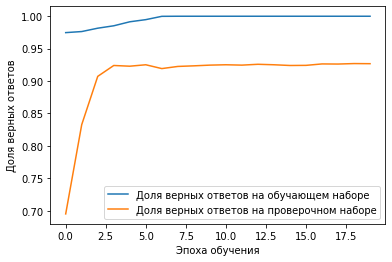

In [0]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Распознавание проверочной выборки


In [0]:
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized, sep='')
  
  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%", sep='')
    
  print()
  
  return sumVal/sumCount

In [0]:
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

In [0]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри распознано 93% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 88% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 87% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 93% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 92% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 99% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 92%



#Embedding


**Embedding + Dense**


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 15075 samples, validate on 5423 samples
Epoch 1/30
15075/15075 [==============================] - 2s 118us/sample - loss: 1.1784 - acc: 0.6638 - val_loss: 2.2595 - val_acc: 0.3004
Epoch 2/30
15075/15075 [==============================] - 2s 105us/sample - loss: 0.5196 - acc: 0.9533 - val_loss: 2.6961 - val_acc: 0.3004
Epoch 3/30
15075/15075 [==============================] - 2s 111us/sample - loss: 0.2486 - acc: 0.9337 - val_loss: 3.0170 - val_acc: 0.3004
Epoch 4/30
15075/15075 [==============================] - 2s 108us/sample - loss: 0.1180 - acc: 0.9426 - val_loss: 2.7014 - val_acc: 0.3006
Epoch 5/30
15075/15075 [==============================] - 2s 106us/sample - loss: 0.0865 - acc: 0.9469 - val_loss: 2.0779 - val_acc: 0.3094
Epoch 6/30
15075/15075 [==============================] - 2s 117us/sample - loss: 0.0737 - acc: 0.9512 - val_loss: 1.5639 - val_acc: 

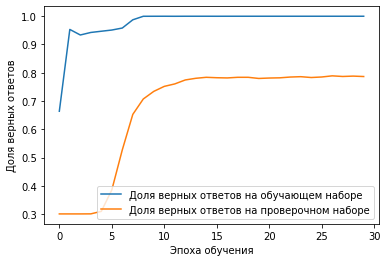

НЕЙРОНКА:  Embedding + Dense

О. Генри распознано 70% сеть считает, что это О. Генри, распознано ВЕРНО!
Стругацкие распознано 76% сеть считает, что это Стругацкие, распознано ВЕРНО!
Булгаков распознано 53% сеть считает, что это Булгаков, распознано ВЕРНО!
Саймак распознано 83% сеть считает, что это Саймак, распознано ВЕРНО!
Фрай распознано 93% сеть считает, что это Фрай, распознано ВЕРНО!
Брэдбери распознано 83% сеть считает, что это Брэдбери, распознано ВЕРНО!

Средний процент распознавания 78%



In [0]:
#Создаём сеть с Embedding слоем
modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 30, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(xTest, yTest))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Проверяем результаты работы Ebedding сети
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)
pred = recognizeMultiClass(modelE, xTest6Classes, "Embedding + Dense")